# Basic Autoencoder on MNIST

In [3]:
import torch
import torch.nn as nn

## 1. Define an MLP autoencoder

In [18]:
class Autoencoder(nn.Module):
    def __init__(self, latent_dim=128):
        super().__init__()
        # encoder
        self.fc1 = nn.Linear(28*28, 256)
        self.fc2 = nn.Linear(256, latent_dim)
        # decoder
        self.fc3 = nn.Linear(latent_dim, 256)
        self.fc4 = nn.Linear(256, 28*28)

    def encode(self, x):
        x = x.view(x.size(0), -1)
        x = torch.relu(self.fc1(x))
        return self.fc2(x)

    def decode(self, z):
        x = torch.relu(self.fc3(z))
        x = torch.sigmoid(self.fc4(x))
        return x.view(-1, 1, 28, 28)

    def forward(self, x):
        z = self.encode(x)
        x_recon = self.decode(z)
        return x_recon


## 2. Training Setup

In [19]:
from torchvision import transforms, datasets
from torch.utils.data import DataLoader

In [20]:
transform = transforms.ToTensor()
train_ds = datasets.MNIST(root="./data", train=True, download=True, transform=transform)
test_ds = datasets.MNIST(root="./data", train=False, download=True, transform=transform)
train_loader = DataLoader(train_ds, batch_size=128, shuffle=True)
test_loader = DataLoader(test_ds, batch_size=256, shuffle=False)

In [60]:
model = Autoencoder()
loss_func = nn.MSELoss()
optim = torch.optim.SGD(params = model.parameters(), lr = 0.4)

## 3. Train and Visualize

In [ ]:
def train_one_epoch(model, loss_func, optimizer, data_loader):
    model.train()
    running_loss = 0.0

    for x, _ in data_loader:

        optimizer.zero_grad()
        x_recon = model(x)

        loss = loss_func(x_recon, x) 
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * x.size(0)

    avg_loss = running_loss / len(data_loader.dataset)
    print(f"Train loss: {avg_loss:.4f}")
    return avg_loss

In [62]:
epochs = 80

for i in range(epochs):
    print(f"Epoch {i}....")
    train_one_epoch(model, loss_func, optim, train_loader)

Epoch 0....
Train loss: 0.1383
Epoch 1....
Train loss: 0.0696
Epoch 2....
Train loss: 0.0686
Epoch 3....
Train loss: 0.0678
Epoch 4....
Train loss: 0.0670
Epoch 5....
Train loss: 0.0657
Epoch 6....
Train loss: 0.0634
Epoch 7....
Train loss: 0.0610
Epoch 8....
Train loss: 0.0586
Epoch 9....
Train loss: 0.0560
Epoch 10....
Train loss: 0.0534
Epoch 11....
Train loss: 0.0508
Epoch 12....
Train loss: 0.0488
Epoch 13....
Train loss: 0.0471
Epoch 14....
Train loss: 0.0457
Epoch 15....
Train loss: 0.0446
Epoch 16....
Train loss: 0.0435
Epoch 17....
Train loss: 0.0424
Epoch 18....
Train loss: 0.0411
Epoch 19....
Train loss: 0.0399
Epoch 20....
Train loss: 0.0388
Epoch 21....
Train loss: 0.0378
Epoch 22....
Train loss: 0.0369
Epoch 23....
Train loss: 0.0361
Epoch 24....
Train loss: 0.0352
Epoch 25....
Train loss: 0.0344
Epoch 26....
Train loss: 0.0336
Epoch 27....
Train loss: 0.0328
Epoch 28....
Train loss: 0.0320
Epoch 29....
Train loss: 0.0313
Epoch 30....
Train loss: 0.0306
Epoch 31....
Train

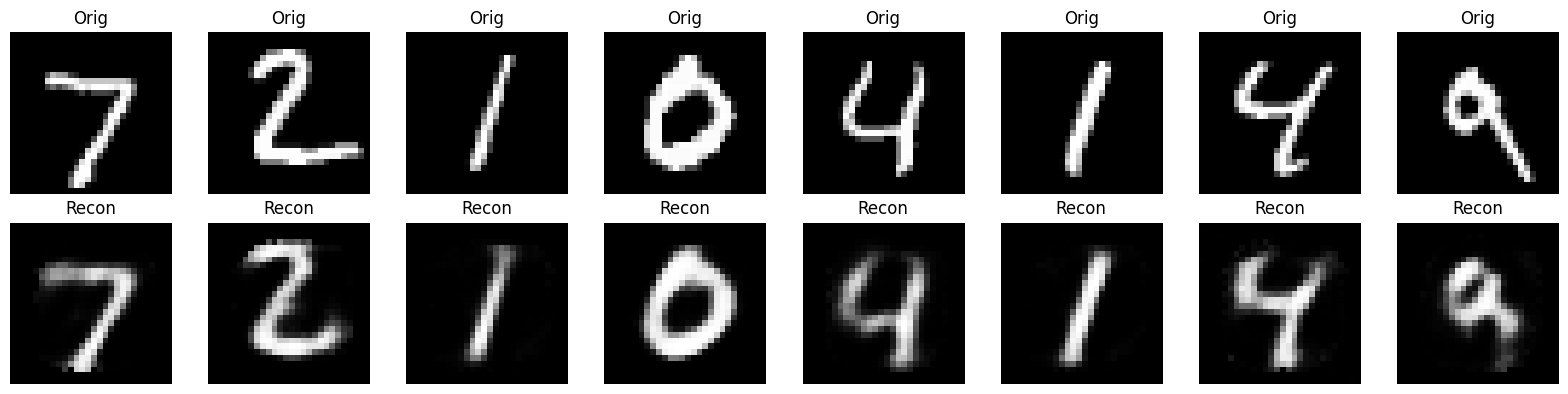

In [63]:
import torch
import matplotlib.pyplot as plt

model.eval()

# how many examples to show
n = 8

# get one batch
x_batch, y_batch = next(iter(test_loader))

device = next(model.parameters()).device
x_batch = x_batch.to(device)

with torch.no_grad():
    x_recon = model(x_batch)
    
n = min(n, x_batch.size(0))

fig, axes = plt.subplots(2, n, figsize=(2 * n, 4))

for i in range(n):
    orig = x_batch[i].cpu()
    recon = x_recon[i].cpu()

    # handle shapes: [1,H,W] (grayscale) or [3,H,W] (RGB)
    def prep(img):
        if img.dim() == 3:
            if img.size(0) == 1:
                img = img.squeeze(0)          # -> [H,W]
            elif img.size(0) == 3:
                img = img.permute(1, 2, 0)    # -> [H,W,3]
        return img

    orig_img = prep(orig)
    recon_img = prep(recon)

    # top row: originals
    axes[0, i].imshow(orig_img, cmap="gray" if orig_img.ndim == 2 else None)
    axes[0, i].set_title("Orig")
    axes[0, i].axis("off")

    # bottom row: reconstructions
    axes[1, i].imshow(recon_img, cmap="gray" if recon_img.ndim == 2 else None)
    axes[1, i].set_title("Recon")
    axes[1, i].axis("off")

plt.tight_layout()
plt.show()
